In [1]:
#Similar to Fit_Get_kT_pT, but using sudo data at bin center, ignore the average bin 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares


LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0321.dat
DSSFFlo PDF set, member #321, version 1; LHAPDF ID = 90321


In [3]:
Factor = 0.3894*1e6/137

Factor_3xs=math.sqrt(5)
Factor_3xspim=math.sqrt(5)

In [4]:
#Files are generated by Unpol_make_datarange_table
#output1 means every kinematics are set to center
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output1_CS3xs_default_x1_stat0_pim_2024.dat',delim_whitespace=False)
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output1_CS3xs_default_x1_stat0_pip_2024.dat',delim_whitespace=False)
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output1_CS3xs_default_x1_stat0_2024.dat',delim_whitespace=False)

#output2 means Everything to center, not phih
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output2_CS3xs_default_x1_stat0_pim_2024.dat',delim_whitespace=False)
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output2_CS3xs_default_x1_stat0_pip_2024.dat',delim_whitespace=False)
df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output2_CS3xs_default_x1_stat0_2024.dat',delim_whitespace=False)

#output3 means Just phi to center
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output3_CS3xs_default_x1_stat0_pim_2024.dat',delim_whitespace=False)
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output3_CS3xs_default_x1_stat0_pip_2024.dat',delim_whitespace=False)
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output3_CS3xs_default_x1_stat0_2024.dat',delim_whitespace=False)

#The origin file is fitted in another notebook

df_3xspim_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment
0,0,11.0,0.125,-2.842849,0.48445,0.35,1.25,0.05,FUUT,0.213543,0.000995,0.0,0.0,neutron,pi-,solid
1,1,11.0,0.125,-2.830942,0.48445,0.35,1.25,0.05,FUUT,0.185148,0.000952,0.0,0.0,neutron,pi-,solid
2,2,11.0,0.125,-2.827864,0.48445,0.35,1.25,0.05,FUUT,0.180240,0.000970,0.0,0.0,neutron,pi-,solid
3,3,11.0,0.125,-2.823136,0.48445,0.35,1.25,0.05,FUUT,0.174723,0.001461,0.0,0.0,neutron,pi-,solid
4,4,11.0,0.125,-2.244161,0.48445,0.35,1.25,0.05,FUUT,0.191898,0.000987,0.0,0.0,neutron,pi-,solid


In [5]:
xpdf = lhapdf.mkPDF("CJ15lo",0)
zff = lhapdf.mkPDF("DSSFFlo",211)

    

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211


In [6]:
def least_square(kt2,pt2):
    least_square = 0                                                                                                                                                              
    for i in range(0,len(df_3xspim_zQ2xbjPhT)):
        x, phih, y, z, Q2, pT, value, stat, target, hadron = df_3xspim_zQ2xbjPhT.loc[i]['x'], df_3xspim_zQ2xbjPhT.loc[i]['phih'], df_3xspim_zQ2xbjPhT.loc[i]['y'], df_3xspim_zQ2xbjPhT.loc[i]['z'], df_3xspim_zQ2xbjPhT.loc[i]['Q2'],df_3xspim_zQ2xbjPhT.loc[i]['pT'], df_3xspim_zQ2xbjPhT.loc[i]['value'],df_3xspim_zQ2xbjPhT.loc[i]['stat'],df_3xspim_zQ2xbjPhT.loc[i]['target'], df_3xspim_zQ2xbjPhT.loc[i]['hadron']
        #print(x,phih,y,z,Q2,pT)
        least_square+=(value-tmd.SigmaAllCahnBM(x, phih, y, Q2, z, pT, target, hadron,kt2,pt2))**2/(Factor_3xspim*stat+0.11*value)**2
    return least_square

m_get_kT_pT = Minuit(least_square,kt2=0.61,pt2=0.117)
m_get_kT_pT.migrad()
m_get_kT_pT.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.564e+04                  │              Nfcn = 57               │
│ EDM = 7.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kt2  │  0.8237   │  0.0034   │            │            │         │         │       │
│ 1 │ pt2  │ 160.8e-3  │  0.5e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │      kt2      pt2 │
├─────┼───────────────────┤
│ kt2 │ 1.17e-05 -0.24e-6 │
│ pt2 │ -0.24e-6 2.16e-07 │
└─────┴───────────────────┘

In [7]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_get_kT_pT.fval:.1f} / {m_get_kT_pT.ndof:.0f} = {m_get_kT_pT.fmin.reduced_chi2:.1f}",
]
print(fit_info)
#print('chi2,n',m_get_kT_pT.fval, m_get_kT_pT.ndof, m_get_kT_pT.fmin.reduced_chi2)
print('par:',m_get_kT_pT.values,'err:',m_get_kT_pT.errors)

#par0 = ()


['$\\chi^2$/$n_\\mathrm{dof}$ = 85643.0 / nan = nan']
par: <ValueView kt2=0.8237351170330321 pt2=0.16082833886020084> err: <ErrorView kt2=0.003418188680259752 pt2=0.0004652617688114655>


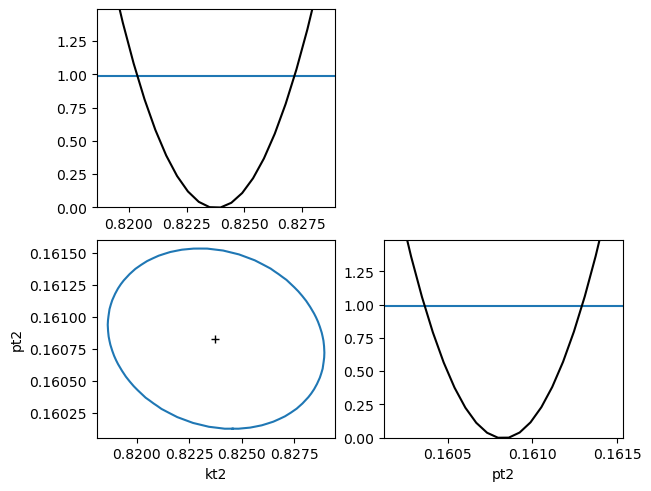

In [8]:

m_get_kT_pT.draw_mnmatrix()#This take forever
plt.savefig('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/fit_results.pdf')


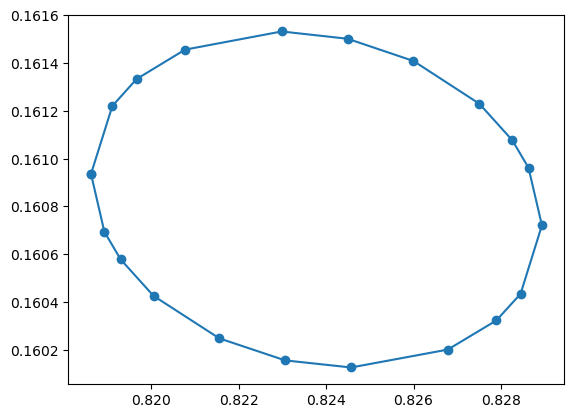

In [9]:
#Less points
pts = m_get_kT_pT.mncontour("kt2","pt2",cl=0.68, size=20)
x, y = np.transpose(pts)
plt.plot(x,y,"o-")

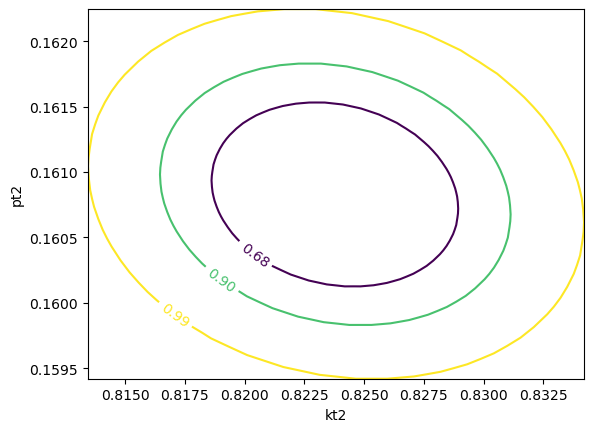

In [10]:
#plt.xlim(0.1,0.2)
#plt.ylim(0.4,0.8)
m_get_kT_pT.draw_mncontour("kt2", "pt2", cl=(0.68, 0.9, 0.99))

plt.savefig('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/fit_results_3contour.pdf')